In [0]:
# Let's import the files
from google.colab import files
files.upload()

{}

In [1]:
# Let's mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
from time import sleep
import os

In [0]:
lookIdDir = "/content/drive/My Drive/Data/FacialDetection/IdLookupTable.csv"
trainDir = "/content/drive/My Drive/Data/FacialDetection/training.csv"
testDir = "/content/drive/My Drive/Data/FacialDetection/test.csv"

In [0]:
train_data = pd.read_csv(trainDir)
test_data = pd.read_csv(testDir)
lookid_data = pd.read_csv(lookIdDir)

In [5]:
print(train_data.shape)
print(test_data.shape)
print(lookid_data.shape)

(7049, 31)
(1783, 2)
(27124, 4)


In [6]:
#Some serious missing column values. I cannot even drop them. What to do ?
print(train_data.isnull().sum(),'\n')
train_data.isnull().any().value_counts()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

True     28
False     3
dtype: int64

In [7]:
train_data.sample(15).T

,1802,5655,1373,6076,2107,6985,148,5147,4429,2453,628,6747,5227,2349,2190
left_eye_center_x,65.4672,67.5376,66.2752,70.5609,70.0165,61.0523,65.1935,67.8332,64.6128,73.7918,64.6432,62.9388,66.2388,67.2325,61.6143
left_eye_center_y,38.448,36.0605,40.4189,42.5162,35.4278,40.0452,39.0719,41.3511,39.556,73.2411,36.017,36.5247,29.5449,34.8212,33.1152
right_eye_center_x,31.5875,29.6234,29.8085,32.2096,29.7254,35.2013,32.5771,25.5833,30.0841,51.0972,30.9722,26.5606,32.0406,28.9524,29.1004
right_eye_center_y,36.4458,40.7998,38.7071,34.2797,38.6221,40.0452,37.5665,43.8861,38.2151,78.3744,39.0039,41.6069,39.2294,38.1499,43.5185
left_eye_inner_corner_x,58.275,NaN,57.7122,NaN,60.6987,NaN,58.67,NaN,NaN,NaN,58.941,NaN,NaN,NaN,54.827
left_eye_inner_corner_y,39.4755,NaN,39.9367,NaN,37.2726,NaN,39.5739,NaN,NaN,NaN,37.6466,NaN,NaN,NaN,36.6719
left_eye_outer_corner_x,73.7659,NaN,74.1548,NaN,78.3337,NaN,70.2114,NaN,NaN,NaN,71.4319,NaN,NaN,NaN,70.0081
left_eye_outer_corner_y,39.9234,NaN,40.6925,NaN,36.1469,NaN,39.5739,NaN,NaN,NaN,36.2886,NaN,NaN,NaN,32.7228
right_eye_inner_corner_x,38.2528,NaN,39.1903,NaN,37.2791,NaN,37.5949,NaN,NaN,NaN,37.7608,NaN,NaN,NaN,36.7401
right_eye_inner_corner_y,38.8696,NaN,39.3697,NaN,39.0861,NaN,38.5701,NaN,NaN,NaN,39.8187,NaN,NaN,NaN,43.129


In [8]:
train_data.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,2268.000000,2268.000000,2270.000000,2270.000000,2225.000000,2225.000000,2270.000000,2270.000000,2236.000000,2236.000000,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,22.384504,38.033495,56.068513,29.332678,79.482826,29.734861,39.322137,29.502998,15.871177,30.428166,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.448233,3.152926,3.083230,3.033621,2.690354,2.307332,3.405852,2.881438,2.350268,2.311907,3.057122,2.910368,3.485485,3.078134,3.986224,3.773744,3.209641,3.106869,3.622533,3.865772,4.280038,5.720567,4.079063,4.579724,3.964552,4.417814,3.323060,5.222500,4.269961,5.407844
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,3.980117,25.123828,17.888717,15.859361,32.206432,10.522325,6.921014,16.476000,3.826243,13.224453,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082895,35.900451,28.783339,36.327681,58.039339,36.626283,71.716503,36.085523,35.506126,36.766783,20.585808,36.534382,54.515587,27.617244,77.673916,27.667948,37.552286,27.790607,13.562183,28.206046,46.602370,59.292697,61.257143,72.875707,30.797646,73.256472,46.494571,69.396748,46.573703,75.549715
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,22.535954,37.867071,56.244975,29.528872,79.784229,29.773813,39.298848,29.569347,15.785709,30.320160,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024752,39.258449,31.768334,39.566729,60.519810,39.260348,75.015645,39.373489,37.753571,39.192917,24.237701,39.415051,57.946415,31.158830,81.590720,31.835621,40.917160,31.251664,17.999040,32.654768,50.330437,66.492686,65.376243,78.879123,35.101302,78.956357,49.296488,76.221644,50.677631,82.233993
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,61.428580,70.746797,79.787831,60.875896,94.269957,60.500298,76.582388,62.083177,58.418216,66.751329,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


How do we impute

1. I can set with Median..Seems a bit stretched across here. I think ffill may generalize here considering the min / max and median and kind of closely integrated. Median will make everything uniform and does not seem like a good fit


In [0]:
train_data.fillna(method = 'ffill',inplace = True)

In [10]:
print(train_data.isnull().sum(),'\n')
train_data.isnull().any().value_counts()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64 



False    31
dtype: int64

Ok. Now the data seems no missing values. Let's move on

In [0]:
# Let's create the image List. This is 96x96 and a few pixels missing inbetween. We will update those pixels to 0 (On a scale of 0 to 255)

image = []
for i in range(0,train_data.shape[0]):
  imgtmp = train_data['Image'][i].split(' ')
  imgtmp = ['0' if x == '' else x for x in imgtmp]
  image.append(imgtmp)

In [0]:
# Converting the list into a numpy array of integers
image_array = np.array(image,dtype=float)

In [57]:
# So this will be an array of 7049 rows (Training data records) and 9216 columns of pixel values (96*96)
image_array.shape

(7049, 9216)

In [58]:
X_train = image_array
X_train.shape

(7049, 9216)

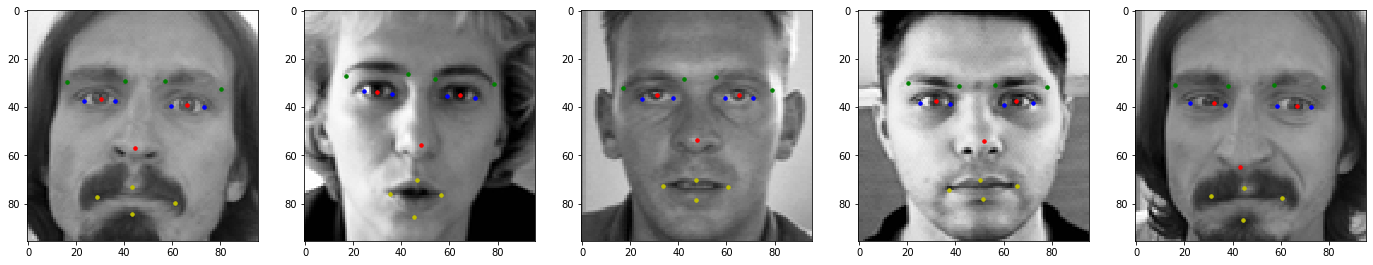

In [59]:
plt.figure(figsize=(24, 24))
for i in range(0,5):
  plt.subplot(1, 5, i + 1)
  plt.imshow(image_array[i].reshape(96,96),cmap='gray')
  plt.scatter(train_data['left_eye_center_x'][i],train_data['left_eye_center_y'][i],c='r',s=12)
  plt.scatter(train_data['right_eye_center_x'][i],train_data['right_eye_center_y'][i],c='r',s=12)
  plt.scatter(train_data['left_eye_inner_corner_x'][i],train_data['left_eye_inner_corner_y'][i],c='b',s=12)
  plt.scatter(train_data['left_eye_outer_corner_x'][i],train_data['left_eye_outer_corner_y'][i],c='b',s=12)
  plt.scatter(train_data['right_eye_inner_corner_x'][i],train_data['right_eye_inner_corner_y'][i],c='b',s=12)
  plt.scatter(train_data['right_eye_outer_corner_x'][i],train_data['right_eye_outer_corner_y'][i],c='b',s=12)
  plt.scatter(train_data['left_eyebrow_inner_end_x'][i],train_data['left_eyebrow_inner_end_y'][i],c='g',s=12)
  plt.scatter(train_data['left_eyebrow_outer_end_x'][i],train_data['left_eyebrow_outer_end_y'][i],c='g',s=12)
  plt.scatter(train_data['right_eyebrow_inner_end_x'][i],train_data['right_eyebrow_inner_end_y'][i],c='g',s=12)
  plt.scatter(train_data['right_eyebrow_outer_end_x'][i],train_data['right_eyebrow_outer_end_y'][i],c='g',s=12)
  plt.scatter(train_data['nose_tip_x'][i],train_data['nose_tip_y'][i],c='r',s=12)
  plt.scatter(train_data['mouth_left_corner_x'][i],train_data['mouth_left_corner_y'][i],c='y',s=12)
  plt.scatter(train_data['mouth_right_corner_x'][i],train_data['mouth_right_corner_y'][i],c='y',s=12)
  plt.scatter(train_data['mouth_center_top_lip_x'][i],train_data['mouth_center_top_lip_y'][i],c='y',s=12)
  plt.scatter(train_data['mouth_center_bottom_lip_x'][i],train_data['mouth_center_bottom_lip_y'][i],c='y',s=12)
plt.show()

In [60]:
# y is target variable with 30 targets to be predicted

train_data.shape

# The first 30 columns are the targets to be predicted

(7049, 31)

In [61]:
y_train = np.array(train_data.iloc[:,:30],dtype=float)
y_train.shape

(7049, 30)

In [18]:
# Time to get TensorFlow
!pip install tensorflow==2.0

     |████████████████████████████████| 86.3MB 57kB/s 
     |████████████████████████████████| 450kB 49.8MB/s 
     |████████████████████████████████| 3.8MB 61.7MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Convolution2D, MaxPooling2D, Flatten, Conv2D, MaxPool2D,LeakyReLU

In [63]:
X_train[0]

array([238., 236., 237., ...,  70.,  75.,  90.])

In [0]:
# Normalize the data
# X_train/=255

In [0]:
X_train = X_train.reshape(-1,96,96,1)

Lets build the neural network now

1. Layer 1 Conv2D with 32 Kernels and 3x3 filter
2. Layer 2 MaxPooling Layer
3. Layer 3 Conv2D with 32 Kernels and 3x3 filter
4. Layer 4 MaxPooling Layer
5. Layer 5 Conv2D with 64 Kernels and 5x5 filter
6. Layer 6 MaxPooling Layer
7. Dense Layer (Flatten not required as our np array is flattened) with 256 neurons
8. Dense Layer with 256 neurons
9. Dense Layer with 128 neurons
10. Dense Layer with 64 neurons
11. Final Dense Output Layer with 30 neurons (No Activation)

All other activations will be LeakyReLU. Will add BatchNormalization for all layers

In [69]:
model = Sequential()

# Layer 1 (This is actually 3 layers, but I am considering it as a single layer )
model.add(Conv2D(filters=32, kernel_size=3, padding='same', input_shape=(96,96,1))) 
model.add(LeakyReLU(0.1))
model.add(BatchNormalization())

# Layer 2 
model.add(MaxPool2D())

# Layer 3 (This is actually 3 layers, but I am considering it as a single layer )
model.add(Conv2D(filters=32, kernel_size=3, padding='same')) 
model.add(LeakyReLU(0.1))
model.add(BatchNormalization())

# Layer 4 
model.add(MaxPool2D())

# Layer 5 (This is actually 3 layers, but I am considering it as a single layer )
model.add(Conv2D(filters=64, kernel_size=5, padding='same')) 
model.add(LeakyReLU(0.1))
model.add(BatchNormalization())

# Layer 6 
model.add(MaxPool2D())

# Layer 7
model.add(Flatten())
model.add(Dense(256))
model.add(LeakyReLU(0.1))
model.add(BatchNormalization())

# Layer 8
model.add(Dense(128))
model.add(LeakyReLU(0.1))
model.add(BatchNormalization())

# Layer 9
model.add(Dense(64))
model.add(LeakyReLU(0.1))
model.add(BatchNormalization())

# Layer 10 - Output Layer with 30 outputs
model.add(Dense(30))
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 96, 96, 32)        320       
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
leaky_re_lu_26 (LeakyReLU)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 48, 48, 32)       

In [0]:
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mse'])

In [71]:
y_train[0]

array([66.03356391, 39.00227368, 30.22700752, 36.4216782 , 59.58207519,
       39.64742256, 73.13034586, 39.96999699, 36.35657143, 37.3894015 ,
       23.45287218, 37.3894015 , 56.95326316, 29.03364812, 80.22712782,
       32.22813835, 40.22760902, 29.0023218 , 16.35637895, 29.64747068,
       44.42057143, 57.06680301, 61.19530827, 79.97016541, 28.61449624,
       77.38899248, 43.3126015 , 72.93545865, 43.13070677, 84.48577444])

In [72]:
model.fit(X_train,y_train,epochs = 50,batch_size = 200,validation_split = 0.2,verbose=True)

Train on 5639 samples, validate on 1410 samples
Epoch 1/50
5639/5639 [==============================] - 127s 23ms/sample - loss: 2663.1287 - mse: 2663.1287 - val_loss: 2746.5174 - val_mse: 2746.5173
Epoch 2/50
5639/5639 [==============================] - 123s 22ms/sample - loss: 2642.9863 - mse: 2642.9868 - val_loss: 2629.2824 - val_mse: 2629.2827
Epoch 3/50
5639/5639 [==============================] - 122s 22ms/sample - loss: 2602.3390 - mse: 2602.3394 - val_loss: 2574.3659 - val_mse: 2574.3657
Epoch 4/50
5639/5639 [==============================] - 121s 22ms/sample - loss: 2535.8879 - mse: 2535.8877 - val_loss: 2524.7043 - val_mse: 2524.7043
Epoch 5/50
5639/5639 [==============================] - 121s 22ms/sample - loss: 2443.6736 - mse: 2443.6736 - val_loss: 2378.9502 - val_mse: 2378.9502
Epoch 6/50
5639/5639 [==============================] - 120s 21ms/sample - loss: 2327.8780 - mse: 2327.8782 - val_loss: 2287.7548 - val_mse: 2287.7546
Epoch 7/50
5639/5639 [========================

In [73]:
# Let's predict one record

y_pred = model.predict(X_train[1].reshape(-1,96,96,1))
print(y_pred)
y_train[1]

[[64.55844  35.896435 30.015228 35.840595 58.995464 37.16179  70.74817
  36.79895  35.56499  35.198696 23.453394 34.52702  54.37017  27.970665
  76.53163  31.671783 42.025978 27.153229 17.137451 27.662815 47.786186
  56.755203 57.590473 75.894066 33.887085 75.185    46.14827  70.52866
  46.300236 83.13913 ]]


array([64.33293617, 34.9700766 , 29.9492766 , 33.44871489, 58.85617021,
       35.27434894, 70.7227234 , 36.18716596, 36.0347234 , 34.36153191,
       24.47251064, 33.14444255, 53.98740426, 28.27594894, 78.63421277,
       30.4059234 , 42.72885106, 26.14604255, 16.8653617 , 27.05885957,
       48.20629787, 55.66093617, 56.42144681, 76.352     , 35.12238298,
       76.04765957, 46.68459574, 70.26655319, 45.46791489, 85.48017021])

In [75]:
test_data.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [76]:
test_data.shape

(1783, 2)

In [0]:
timage = []
for i in range(0,test_data.shape[0]):
  imgtmp = test_data['Image'][i].split(' ')
  imgtmp = ['0' if x == '' else x for x in imgtmp]
  timage.append(imgtmp)

In [84]:
X_test = np.array(timage,dtype=float).reshape(-1,96,96,1)
X_test.shape

(1783, 96, 96, 1)

In [83]:
X_train.shape

(7049, 96, 96, 1)

In [0]:
predictions = pd.DataFrame(model.predict(X_test),columns=train_data.columns[0:30])

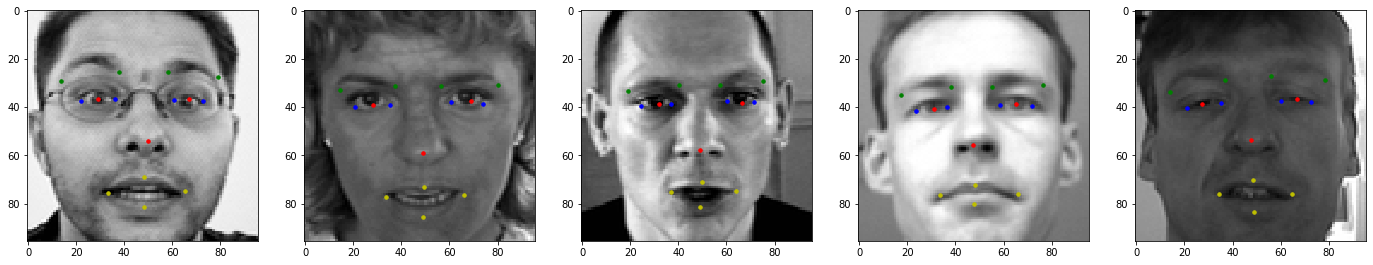

In [98]:
# Let's now print 5 test images and apply our markers on them using predicted values

plt.figure(figsize=(24, 24))
for i in range(0,5):
  plt.subplot(1, 5, i + 1)
  plt.imshow(X_test[i].reshape(96,96),cmap='gray')
  plt.scatter(predictions['left_eye_center_x'][i],predictions['left_eye_center_y'][i],c='r',s=12)
  plt.scatter(predictions['right_eye_center_x'][i],predictions['right_eye_center_y'][i],c='r',s=12)
  plt.scatter(predictions['left_eye_inner_corner_x'][i],predictions['left_eye_inner_corner_y'][i],c='b',s=12)
  plt.scatter(predictions['left_eye_outer_corner_x'][i],predictions['left_eye_outer_corner_y'][i],c='b',s=12)
  plt.scatter(predictions['right_eye_inner_corner_x'][i],predictions['right_eye_inner_corner_y'][i],c='b',s=12)
  plt.scatter(predictions['right_eye_outer_corner_x'][i],predictions['right_eye_outer_corner_y'][i],c='b',s=12)
  plt.scatter(predictions['left_eyebrow_inner_end_x'][i],predictions['left_eyebrow_inner_end_y'][i],c='g',s=12)
  plt.scatter(predictions['left_eyebrow_outer_end_x'][i],predictions['left_eyebrow_outer_end_y'][i],c='g',s=12)
  plt.scatter(predictions['right_eyebrow_inner_end_x'][i],predictions['right_eyebrow_inner_end_y'][i],c='g',s=12)
  plt.scatter(predictions['right_eyebrow_outer_end_x'][i],predictions['right_eyebrow_outer_end_y'][i],c='g',s=12)
  plt.scatter(predictions['nose_tip_x'][i],predictions['nose_tip_y'][i],c='r',s=12)
  plt.scatter(predictions['mouth_left_corner_x'][i],predictions['mouth_left_corner_y'][i],c='y',s=12)
  plt.scatter(predictions['mouth_right_corner_x'][i],predictions['mouth_right_corner_y'][i],c='y',s=12)
  plt.scatter(predictions['mouth_center_top_lip_x'][i],predictions['mouth_center_top_lip_y'][i],c='y',s=12)
  plt.scatter(predictions['mouth_center_bottom_lip_x'][i],predictions['mouth_center_bottom_lip_y'][i],c='y',s=12)
plt.show()

In [100]:
predictions.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,67.001068,36.532639,28.982258,36.588299,60.571590,36.757202,72.855423,37.510628,36.078873,36.690105,21.889698,37.575443,58.271458,25.278646,78.856461,27.452679,37.664085,25.221653,13.781410,28.925707,50.076027,54.099979,65.181488,74.815575,33.174175,75.571526,48.369892,69.074104,48.372910,81.505547
1,68.942558,37.341171,28.150637,38.866650,60.842861,37.947868,74.160461,38.770901,35.284172,38.975136,20.880289,39.738926,56.622921,31.243708,80.381638,30.544460,37.484043,31.308981,14.378936,32.594757,48.842907,59.126972,65.906448,76.514786,33.744938,77.131096,49.253952,72.930023,48.955875,85.494179
2,66.481712,38.097172,31.794239,38.677441,60.190357,37.334137,71.368011,37.673241,36.983974,38.711430,24.594332,39.346115,57.436356,30.523497,75.311302,29.100855,40.058941,30.704655,18.970222,33.120258,49.135284,57.705032,64.092690,74.627144,36.838524,75.152000,49.868862,71.097832,49.103931,81.579811
3,65.126923,38.608147,30.907377,40.794479,58.341358,38.957230,71.663055,39.317177,36.305752,39.909290,23.520964,41.337078,55.332832,31.378565,76.296349,30.663723,38.332058,31.642044,17.191565,34.836346,47.186527,55.831848,66.136948,75.931381,33.440655,76.387001,48.112640,72.108246,47.656242,80.185684
4,66.852676,36.526096,27.421492,38.802002,59.950222,37.239189,72.729980,37.962185,35.026108,38.308018,21.111502,40.201645,56.042389,27.121490,78.372101,28.707636,36.799633,28.739820,13.970059,33.506001,47.802280,53.401119,64.663139,76.066132,34.232880,75.974388,48.323868,70.277367,49.110336,83.416283


In [102]:
print(test_data.shape)
print(predictions.shape)

(1783, 2)
(1783, 30)


In [0]:
final_predicted_values = pd.concat([test_data,predictions],axis=1,sort=False)

In [105]:
print(final_predicted_values.shape)
print(train_data.shape)

(1783, 32)
(7049, 31)


In [106]:
final_predicted_values.head()

,ImageId,Image,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,1,182 183 182 182 180 180 176 169 156 137 124 10...,67.001068,36.532639,28.982258,36.588299,60.571590,36.757202,72.855423,37.510628,36.078873,36.690105,21.889698,37.575443,58.271458,25.278646,78.856461,27.452679,37.664085,25.221653,13.781410,28.925707,50.076027,54.099979,65.181488,74.815575,33.174175,75.571526,48.369892,69.074104,48.372910,81.505547
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...,68.942558,37.341171,28.150637,38.866650,60.842861,37.947868,74.160461,38.770901,35.284172,38.975136,20.880289,39.738926,56.622921,31.243708,80.381638,30.544460,37.484043,31.308981,14.378936,32.594757,48.842907,59.126972,65.906448,76.514786,33.744938,77.131096,49.253952,72.930023,48.955875,85.494179
2,3,177 176 174 170 169 169 168 166 166 166 161 14...,66.481712,38.097172,31.794239,38.677441,60.190357,37.334137,71.368011,37.673241,36.983974,38.711430,24.594332,39.346115,57.436356,30.523497,75.311302,29.100855,40.058941,30.704655,18.970222,33.120258,49.135284,57.705032,64.092690,74.627144,36.838524,75.152000,49.868862,71.097832,49.103931,81.579811
3,4,176 174 174 175 174 174 176 176 175 171 165 15...,65.126923,38.608147,30.907377,40.794479,58.341358,38.957230,71.663055,39.317177,36.305752,39.909290,23.520964,41.337078,55.332832,31.378565,76.296349,30.663723,38.332058,31.642044,17.191565,34.836346,47.186527,55.831848,66.136948,75.931381,33.440655,76.387001,48.112640,72.108246,47.656242,80.185684
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...,66.852676,36.526096,27.421492,38.802002,59.950222,37.239189,72.729980,37.962185,35.026108,38.308018,21.111502,40.201645,56.042389,27.121490,78.372101,28.707636,36.799633,28.739820,13.970059,33.506001,47.802280,53.401119,64.663139,76.066132,34.232880,75.974388,48.323868,70.277367,49.110336,83.416283
